In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df=sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df.dropna(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df.sex=le.fit_transform(df.sex)
df.island=le.fit_transform(df.island)

In [19]:
df.species=le.fit_transform(df.species)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


In [20]:
y=df.species
x=df.drop('species',axis=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier(n_estimators=7,criterion='gini')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
rd.fit(x_train,y_train)

RandomForestClassifier(n_estimators=7)

In [44]:
y_pred=rd.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
accuracy_score(y_test,y_pred)

0.99

cm=confusion_matrix(y_test,y_pred)
cm

<Axes: >

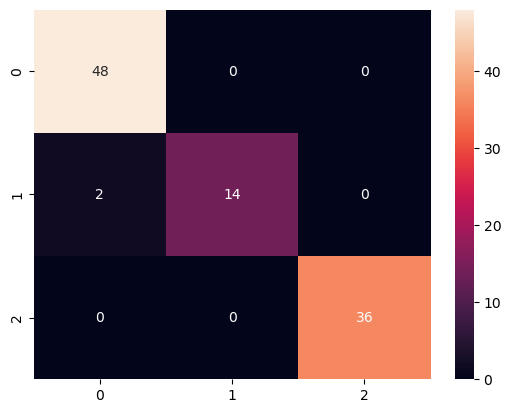

In [38]:
cm=confusion_matrix(y_test,y_pred) 
sns.heatmap(cm,annot=True)

In [36]:
cm

array([[48,  0,  0],
       [ 2, 14,  0],
       [ 0,  0, 36]], dtype=int64)

In [37]:
rd.score(x_test,y_test)

0.98

NameError: name 'df' is not defined